# PERSONAL EXPENSE TRACKER (MONTHLY)
BY ALISHA KHAN

### Project Goal
Build a personal banking expense tracker that:
- Extracts transactions from PDF bank statements
- Parses and cleans the data into structured format
- Automatically categorizes spending (e.g., Food, Transportation)
- Provides clear visual insights into spending behavior

In [20]:
!pip install pdfplumber

### PDF EXTRACTION

In [7]:
import pdfplumber

with pdfplumber.open("Statements.pdf") as pdf:
    for page in pdf.pages:
        text = page.extract_text()
        print(text) 


CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox


----
|
continuedonnextpage
Page1of4
*000000922*
983961
-
-
90
-
20
-
20
-
-
IRH
8106070
-
210_3024975_00061VASBS
41582
2251ISLINGTONAVENUENORTH
ETOBICOKEONTARIO M9W3W6
46007
SBSAV16000_5794203_012 E D 41582
MSALISHAKHAN
31TIPPETTRDUNIT1309 Youraccountnumber:
NORTHYORKON 415822336928
M3H0C8
Questions?
Call18004-SCOTIA
(1800472-6842)
Foronlineaccountaccess:
Your Preferred Package account summary www.scotiabank.com
OpeningBalanceonApril18,2025 $197.58
Minustotalwithdrawals $2,892.44
Plustotaldeposits $2,987.96
ClosingBalanceonMay17,2025 $293.10
Here's what happened in your account this statement period
Amounts Amounts
Date Transactions withdrawn($) deposited($) Balance($)
Apr18 OpeningBalance 197.58
Apr19 Pointofsalepurchase 3.30 194.28
AposPres/5Gm6P6Hrln
Apr19 Pointofsalepurchase 12.81 181.47
AposDollarama#386EtobicokeONCA
Apr21 Pointofsalepurchase 3.30 178.17
AposPres/5Gn11Nqq6B
Apr22 Withdrawal 113.00 65.17
15483976FreeInteracE-Transfer
Apr22 Withdrawal 45.00 20.17
16232506FreeInterac

CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox


----
|
MSALISHAKHAN
YourPreferredPackageaccount
April18toMay17,2025 415822336928
Here's what happened in your account (continued)
Amounts Amounts
Date Transactions withdrawn($) deposited($) Balance($)
May12 Pointofsalepurchase 3.30 1,206.14
AposPres/5H11H07N2W
May12 Pointofsalepurchase 3.30 1,202.84
AposPres/5H1271PC9W
May13 Pointofsalepurchase 3.30 1,199.54
AposPres/5H16Llgttq
May13 Pointofsalepurchase 3.73 1,195.81
AposDollarTree#4EtobicokeONCA
May14 MB-Transferto 122.08 1,073.73
CreditCard
May14 Pointofsalepurchase 3.30 1,070.43
AposPres/5H1CP2Sltt
May14 Pointofsalepurchase 24.80 1,045.63
AposChaiandChutneEtobicokeONCA
May15 Pointofsalepurchase 3.30 1,042.33
AposPres/5H1G6Ldvxc
May15 Pointofsalepurchase 33.52 1,008.81
OposUberCanada/UbereatstorontoONCA
May15 Pointofsalepurchase 10.81 998.00
AposMcdonald'S#401EtobicokeONCA
May16 Pointofsalepurchase 3.30 994.70
AposPres/5H1L9Fj8JP
May16 Deposit 15.00 1,009.70
80431671FreeInteracE-Transfer
May16 Pointofsalepurchase 3.30 1,006.40
AposPr

### DATA PARSING AND CLEANING

In [9]:
import re
import pandas as pd

# pasting from above extraction
raw_text = """
Date Transactions withdrawn($) deposited($) Balance($)
Apr18 OpeningBalance 197.58
Apr19 Pointofsalepurchase 3.30 194.28
AposPres/5Gm6P6Hrln
Apr19 Pointofsalepurchase 12.81 181.47
AposDollarama#386EtobicokeONCA
Apr21 Pointofsalepurchase 3.30 178.17
AposPres/5Gn11Nqq6B
Apr22 Withdrawal 113.00 65.17
15483976FreeInteracE-Transfer
Apr22 Withdrawal 45.00 20.17
16232506FreeInteracE-Transfer
Apr23 Deposit 200.00 220.17
16850920FreeInteracE-Transfer
Apr23 Deposit 200.00 420.17
16852922FreeInteracE-Transfer
Apr23 Withdrawal 300.00 120.17
16854569FreeInteracE-Transfer
Apr23 Pointofsalepurchase 3.30 116.87
AposPres/5Gn122T7Cl
Apr23 Pointofsalepurchase 3.30 113.57
AposPres/5Gn5Lf9F65
Apr23 Pointofsalepurchase 3.30 110.27
AposPres/5Gnf69Drxf
----
|
Here's what happened in your account (continued)
Amounts Amounts
Date Transactions withdrawn($) deposited($) Balance($)
Apr24 Pointofsalepurchase 11.29 98.98
OposUberCanada/UberoneTorontoONCA
Apr24 Pointofsalepurchase 3.30 95.68
AposPres/5Gnj2329Lx
Apr25 Pointofsalepurchase 3.30 92.38
AposPres/5Gnk6Mpzr9
Apr25 Payrolldep. 769.04 861.42
Payroll
Apr25 Pointofsalepurchase 1.09 860.33
OposUberCanada/UberoneTorontoONCA
Apr25 Pointofsalepurchase 3.30 857.03
AposPres/5Gnn6K2Hw6
Apr25 Errorcorrection 1.09 858.12
OposUberCanada/UberoneTorontoONCA
Apr25 Pointofsalerefund 11.29 869.41
OposUberCanadaTorontoONCA
Apr26 Pointofsalepurchase 3.30 866.11
AposPres/5Gnkjdq2N7
Apr28 Deposit 7.03 873.14
27943058FreeInteracE-Transfer
Apr28 Pointofsalepurchase 3.30 869.84
AposPres/5G779N2Xsk
Apr29 Pointofsalepurchase 3.30 866.54
AposPres/5G7G34Jq7L
Apr29 Withdrawal 818.00 48.54
32931389FreeInteracE-Transfer
Apr30 Pointofsalepurchase 3.30 45.24
AposPres/5G7L96Jztk
Apr30 Pointofsalepurchase 3.30 41.94
AposPres/5G7Mk3Jpc6
Apr30 Deposit 120.00 161.94
37689993FreeInteracE-Transfer
May1 Withdrawal 21.27 140.67
40884634FreeInteracE-Transfer
May1 Pointofsalepurchase 3.30 137.37
AposPres/5Gp1Bdt2Vp
May1 Deposit 200.00 337.37
43312326FreeInteracE-Transfer
continuedonnextpage
Page2of4
093961
8106070
-
210_3024975_00061VASBS
----
|
Here's what happened in your account (continued)
Amounts Amounts
Date Transactions withdrawn($) deposited($) Balance($)
May1 Withdrawal 100.00 237.37
43384008FreeInteracE-Transfer
May1 Withdrawal 100.00 137.37
43392895FreeInteracE-Transfer
May2 CreditCard/LOCpayment 0.66 136.71
May2 Pointofsalepurchase 3.30 133.41
AposPres/5Gp59K9Ggz
May2 Pointofsalepurchase 4.74 128.67
AposTimHortons#34EtobicokeONCA
May5 Pointofsalepurchase 3.30 125.37
AposPres/5Gpj8Pqscv
May5 Pointofsalepurchase 3.30 122.07
AposPres/5Gpk2K6Ktv
May6 Deposit 695.47 817.54
56125602MB-Dep
May6 Pointofsalepurchase 3.30 814.24
AposPres/5Gppp2V7Lt
May7 Pointofsalepurchase 3.30 810.94
AposPres/5H04747Fk9
May8 Pointofsalepurchase 3.30 807.64
AposPres/5H08Kpxwck
May8 Pointofsalepurchase 4.74 802.90
AposTimHortons#34EtobicokeONCA
May8 Pointofsalepurchase 15.09 787.81
OposUberCanada/UbertriptorontoONCA
May8 Pointofsalepurchase 18.50 769.31
OposUberCanada/UbertriptorontoONCA
May8 Pointofsalepurchase 120.00 649.31
AposNorthYorkFootNorthYorkONCA
May8 Pointofsalepurchase 9.36 639.95
AposShoppersDrugMTorontoONCA
May8 Pointofsalepurchase 12.61 627.34
OposUberCanada/UbertriptorontoONCA
May10 Withdrawal 86.94 540.40
66826740FreeInteracE-Transfer
May10 MB-Transferto 100.00 440.40
CreditCard
May12 Payrolldep. 769.04 1,209.44
Payroll
continuedonnextpage
Page3of4
*000000812*
193961
-
-
80
-
10
-
20
-
-
IRH
8106070
-
210_3024975_00061VASBS
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
----
|
Here's what happened in your account (continued)
Amounts Amounts
Date Transactions withdrawn($) deposited($) Balance($)
May12 Pointofsalepurchase 3.30 1,206.14
AposPres/5H11H07N2W
May12 Pointofsalepurchase 3.30 1,202.84
AposPres/5H1271PC9W
May13 Pointofsalepurchase 3.30 1,199.54
AposPres/5H16Llgttq
May13 Pointofsalepurchase 3.73 1,195.81
AposDollarTree#4EtobicokeONCA
May14 MB-Transferto 122.08 1,073.73
CreditCard
May14 Pointofsalepurchase 3.30 1,070.43
AposPres/5H1CP2Sltt
May14 Pointofsalepurchase 24.80 1,045.63
AposChaiandChutneEtobicokeONCA
May15 Pointofsalepurchase 3.30 1,042.33
AposPres/5H1G6Ldvxc
May15 Pointofsalepurchase 33.52 1,008.81
OposUberCanada/UbereatstorontoONCA
May15 Pointofsalepurchase 10.81 998.00
AposMcdonald'S#401EtobicokeONCA
May16 Pointofsalepurchase 3.30 994.70
AposPres/5H1L9Fj8JP
May16 Deposit 15.00 1,009.70
80431671FreeInteracE-Transfer
May16 Pointofsalepurchase 3.30 1,006.40
AposPres/5H1M9Jfc68
May16 Pointofsalepurchase 3.30 1,003.10
AposPres/5H1N4L5G5P
May16 Pointofsalepurchase 710.00 293.10
OposRemitly*Gf5A6VancouverBCCA
May17 ClosingBalance $293.10
Page4of4
293961
8106070
-
210_3024975_00061VASBS
"""

# Splitting text into lines
lines = raw_text.strip().split("\n")

records = []
i = 0

while i < len(lines):
    line = lines[i].strip()
    match = re.match(r"([A-Za-z]{3}\d{1,2})\s+(.+?)\s+([\d,.]+)\s+([\d,.]+)", line)

    if match:
        date = match.group(1)
        trans_type = match.group(2)
        amount = float(match.group(3).replace(',', ''))
        balance = float(match.group(4).replace(',', ''))

        # Checking next line for description
        description = ""
        if i + 1 < len(lines) and not re.match(r"[A-Za-z]{3}\d{1,2}", lines[i + 1]):
            description = lines[i + 1].strip()
            i += 1  # Skipping description line in next iteration

        # Determining direction
        if trans_type.lower() in ["deposit", "payrolldep.", "pointofsalerefund"]:
            amount_signed = abs(amount)
        else:
            amount_signed = -abs(amount)

        records.append({
            "Date": date,
            "Transaction_Type": trans_type,
            "Amount": amount_signed,
            "Balance": balance,
            "Description": description
        })
    i += 1

df = pd.DataFrame(records)
print(df)


     Date     Transaction_Type  Amount  Balance  \
0   Apr19  Pointofsalepurchase   -3.30   194.28   
1   Apr19  Pointofsalepurchase  -12.81   181.47   
2   Apr21  Pointofsalepurchase   -3.30   178.17   
3   Apr22           Withdrawal -113.00    65.17   
4   Apr22           Withdrawal  -45.00    20.17   
..    ...                  ...     ...      ...   
60  May16  Pointofsalepurchase   -3.30   994.70   
61  May16              Deposit   15.00  1009.70   
62  May16  Pointofsalepurchase   -3.30  1006.40   
63  May16  Pointofsalepurchase   -3.30  1003.10   
64  May16  Pointofsalepurchase -710.00   293.10   

                       Description  
0              AposPres/5Gm6P6Hrln  
1   AposDollarama#386EtobicokeONCA  
2              AposPres/5Gn11Nqq6B  
3    15483976FreeInteracE-Transfer  
4    16232506FreeInteracE-Transfer  
..                             ...  
60             AposPres/5H1L9Fj8JP  
61   80431671FreeInteracE-Transfer  
62             AposPres/5H1M9Jfc68  
63             Ap

#### SO FAR:
- Used pdfplumber to extract raw text from text-based bank statements
- Manually filtered out non-transactional content (e.g., headers, footers)
- Built a custom parser to detect transaction lines and descriptions
- Created a structured DataFrame with columns:
Date, Transaction_Type, Amount, Balance, Description

## SPENDING CATEGORIZATION

In [10]:
def categorize(desc):
    desc = desc.lower()

    if any(keyword in desc for keyword in ["ubereat", "mcdonald", "tim", "chai", "shoppers", "dollarama"]):
        return "Food & Delivery"
    
    elif any(keyword in desc for keyword in ["uber", "ttc", "pres", "opos", "trip", "lyft"]) and "ubereat" not in desc:
        return "Transportation"
    
    elif "remitly" in desc or "transfer" in desc or "creditcard" in desc:
        return "Transfers/Payments"

    elif "payroll" in desc or "deposit" in desc:
        return "Income"

    else:
        return "Other"
df["Category"] = df["Description"].apply(categorize)

#### Used keyword-matching logic to assign categories such as:
- Food & Delivery
- Transportation
- Transfers/Payments
- Income
- Other

## SPENDING BY CATEGORY

In [11]:
# Filtering only spending
spending = df[df["Amount"] < 0]

# Grouping and summarizing
summary = spending.groupby("Category")["Amount"].sum().abs().sort_values(ascending=False)
print("📊 Spending Summary by Category:")
print(summary)


📊 Spending Summary by Category:
Category
Transfers/Payments    1806.29
Transportation         862.07
Other                  124.39
Food & Delivery        100.78
Name: Amount, dtype: float64


## OVERSPENDING ALERTS

In [13]:
limits = {
    "Food & Delivery": 150,
    "Shopping": 100,
    "Transfers/Payments": 1000
}

for category, total in summary.items():
    if category in limits and total > limits[category]:
        print(f"⚠️ Overspent on {category}: ${total:.2f} (Limit: ${limits[category]})")

⚠️ Overspent on Transfers/Payments: $1806.29 (Limit: $1000)


## VISUALIZATIONS

C:\Users\alish\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 128184 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\alish\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 128184 missing from current font.
  font.set_text(s, 0, flags=flags)


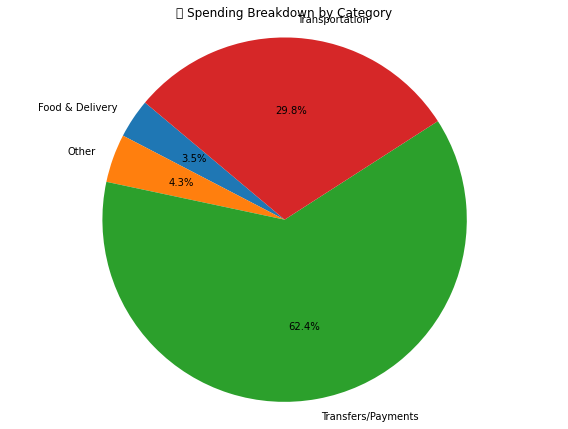

In [15]:
import matplotlib.pyplot as plt

# Filtering for only expenses (Amount < 0)
spending = df[df["Amount"] < 0]

# Grouping by category
category_summary = spending.groupby("Category")["Amount"].sum().abs()

# Plot
plt.figure(figsize=(8, 6))
plt.pie(category_summary, labels=category_summary.index, autopct='%1.1f%%', startangle=140)
plt.title("💸 Spending Breakdown by Category")
plt.axis('equal') 
plt.tight_layout()
plt.show()


In [16]:
from datetime import datetime

# Adding year to ensure full date parsing 
def convert_to_date(d):
    try:
        return datetime.strptime(d + " 2025", "%b%d %Y")
    except:
        return None  # for rows like 'ClosingBalance'

df["Parsed_Date"] = df["Date"].apply(convert_to_date)


In [17]:
# Filtering for only expenses
spending = df[df["Amount"] < 0]

# Grouping by date
daily_summary = spending.groupby("Parsed_Date")["Amount"].sum().abs().reset_index()


C:\Users\alish\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 128200 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\alish\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 128200 missing from current font.
  font.set_text(s, 0, flags=flags)


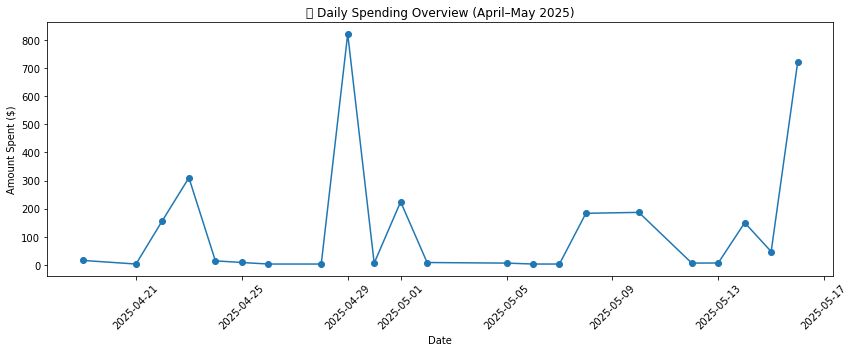

In [19]:
plt.figure(figsize=(12, 5))
plt.plot(daily_summary["Parsed_Date"], daily_summary["Amount"], marker='o')
plt.xticks(rotation=45)
plt.title("📈 Daily Spending Overview (April–May 2025)")
plt.xlabel("Date")
plt.ylabel("Amount Spent ($)")
plt.tight_layout()
plt.show()


## INSIGHTS
- Highest spending category: Transportation
- Multiple small purchases from Pres/Uber/Presto indicating daily transport use (as the user is a student and part-time worker this is valid)
- Peaks in spending correspond to large withdrawals/transfers